In [138]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import multivariate_normal

In [106]:
# mahalanobis distance function
def mahalanobis_distance(x, mean, covariance):
    diff = x - mean
    return np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance)), diff.T))

In [107]:
#problem 1a: 

# class means
m1 = np.array([2, 1])
m2 = np.array([-2, 1])

# print the means
print("Class 1 Mean:", m1)
print("Class 2 Mean:", m2)

# covariance matrices
Sigma1 = np.array([[1, -1], [-1, 4]])
Sigma2 = np.array([[4, 0], [0, 1]])

# print covariance
print("Sigma1:", Sigma1)
print("Sigma2", Sigma2)

# creating the grid points 
x = np.linspace(-6, 6, 100)
y = np.linspace(-4, 6, 100)
X, Y = np.meshgrid(x, y)

# calc Mahalanobis distances for class 1
distances_class1 = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        point = np.array([X[i, j], Y[i, j]])
        distances_class1[i, j] = mahalanobis_distance(point, m1, Sigma1)

# Calculate Mahalanobis distances for class 2
distances_class2 = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        point = np.array([X[i, j], Y[i, j]])
        distances_class2[i, j] = mahalanobis_distance(point, m2, Sigma2)

Class 1 Mean: [2 1]
Class 2 Mean: [-2  1]
Sigma1: [[ 1 -1]
 [-1  4]]
Sigma2 [[4 0]
 [0 1]]


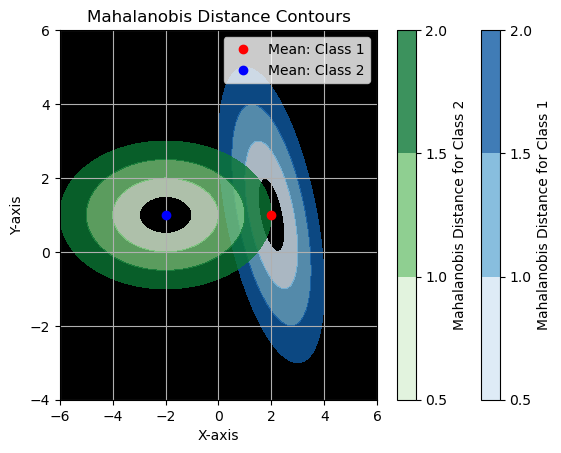

In [108]:
plt.gca().set_facecolor('black')

plt.plot(m1[0], m1[1], 'ro', label='Mean: Class 1')
plt.plot(m2[0], m2[1], 'bo', label='Mean: Class 2')

levels=[0.5, 1.0, 1.5, 2.0]

contour1 = plt.contourf(X, Y, distances_class1, levels, cmap='Blues', alpha=0.8)
contour2 = plt.contourf(X, Y, distances_class2, levels, cmap='Greens', alpha=0.8)

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Mahalanobis Distance Contours')
plt.legend()
plt.grid(True)

cbar1 = plt.colorbar(contour1, label='Mahalanobis Distance for Class 1', extend='both')

cbar2 = plt.colorbar(contour2, label='Mahalanobis Distance for Class 2', extend='both')

plt.show()


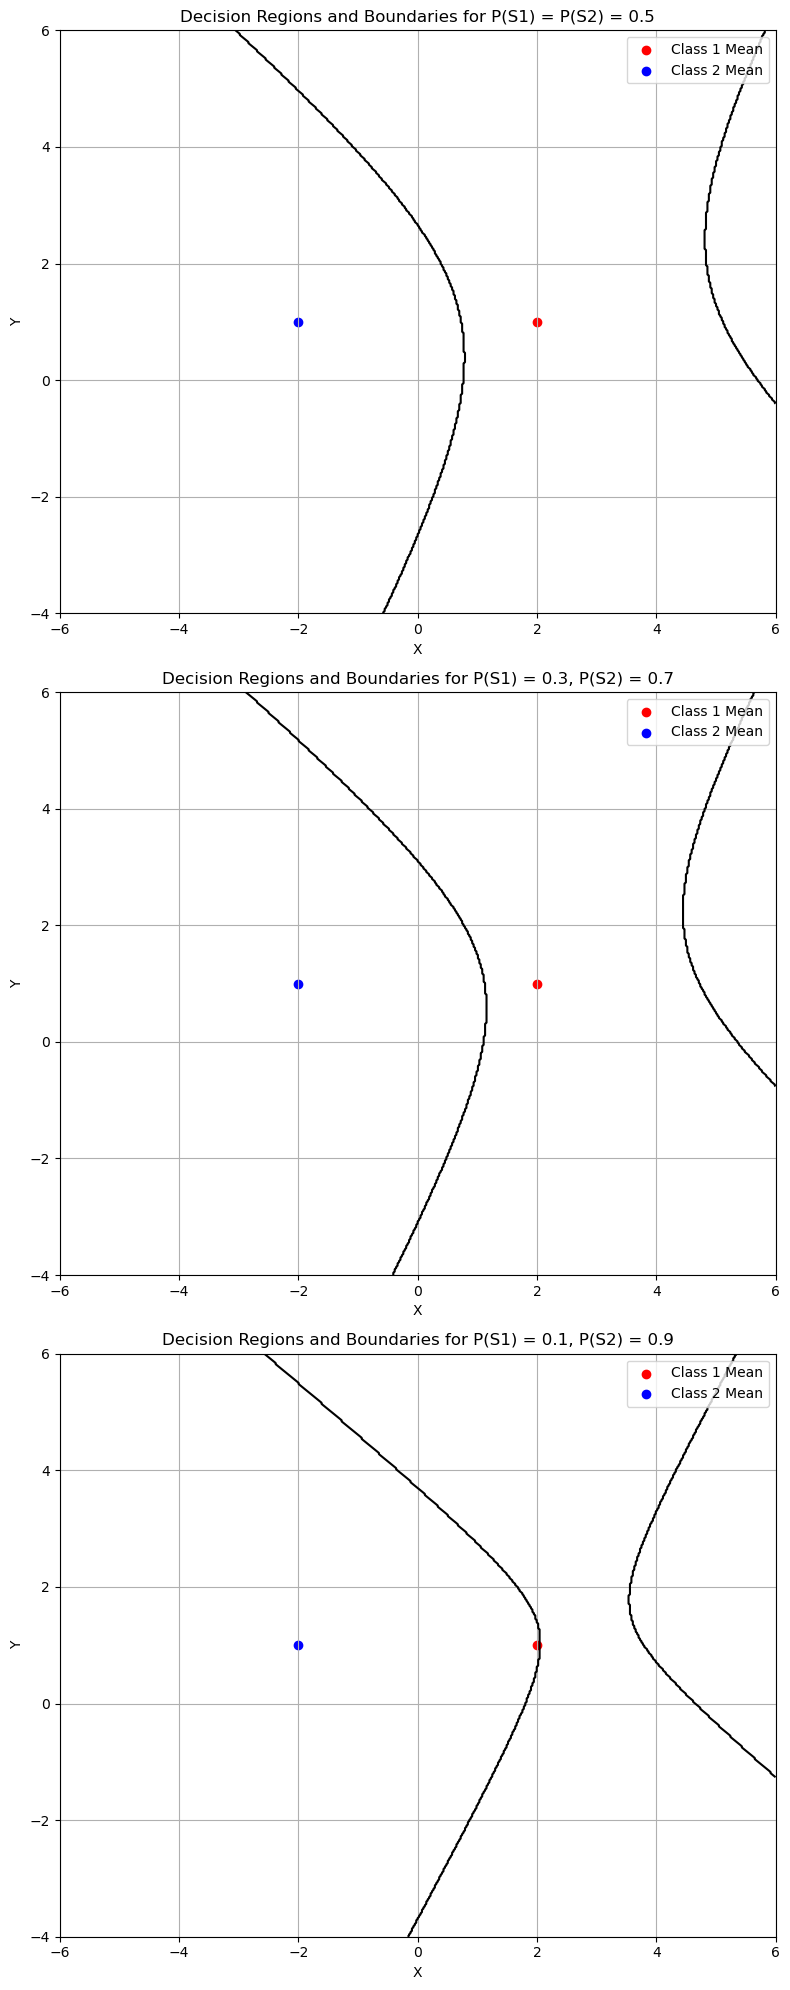

In [141]:
# problem 1c:

def decision_boundary(x, m1, m2, Sigma1, Sigma2, P_S1, P_S2):
    A = np.log(multivariate_normal.pdf(x, mean=m1, cov=Sigma1)) - np.log(multivariate_normal.pdf(x, mean=m2, cov=Sigma2))
    B = np.log(P_S2) - np.log(P_S1)
    return A - B

m1 = np.array([2, 1])
m2 = np.array([-2, 1])

Sigma1 = np.array([[1, -1], [-1, 4]])
Sigma2 = np.array([[4, 0], [0, 1]])

y = np.linspace(-4, 6, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

decision_region1 = decision_boundary(pos, m1, m2, Sigma1, Sigma2, 0.5, 0.5)
decision_region2 = decision_boundary(pos, m1, m2, Sigma1, Sigma2, 0.3, 0.7)
decision_region3 = decision_boundary(pos, m1, m2, Sigma1, Sigma2, 0.1, 0.9)

fig, axs = plt.subplots(3, 1, figsize=(8, 20))

# plot decision region for case (i)
axs[0].contour(X, Y, np.where(decision_region1 >= 0, 1, 0), levels=[0.5], colors='black')
axs[0].scatter(m1[0], m1[1], c='red', marker='o', label='Class 1 Mean')
axs[0].scatter(m2[0], m2[1], c='blue', marker='o', label='Class 2 Mean')
axs[0].set_title('Decision Regions and Boundaries for P(S1) = P(S2) = 0.5')
axs[0].legend()
axs[0].grid(True)

# plot decision region for case (ii)
axs[1].contour(X, Y, np.where(decision_region2 >= 0, 1, 0), levels=[0.5], colors='black')
axs[1].scatter(m1[0], m1[1], c='red', marker='o', label='Class 1 Mean')
axs[1].scatter(m2[0], m2[1], c='blue', marker='o', label='Class 2 Mean')
axs[1].set_title('Decision Regions and Boundaries for P(S1) = 0.3, P(S2) = 0.7')
axs[1].legend()
axs[1].grid(True)

# plot decision region for case (iii)
axs[2].contour(X, Y, np.where(decision_region3 >= 0, 1, 0), levels=[0.5], colors='black')
axs[2].scatter(m1[0], m1[1], c='red', marker='o', label='Class 1 Mean')
axs[2].scatter(m2[0], m2[1], c='blue', marker='o', label='Class 2 Mean')
axs[2].set_title('Decision Regions and Boundaries for P(S1) = 0.1, P(S2) = 0.9')
axs[2].legend()
axs[2].grid(True)

for ax in axs:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.tight_layout()
plt.show()


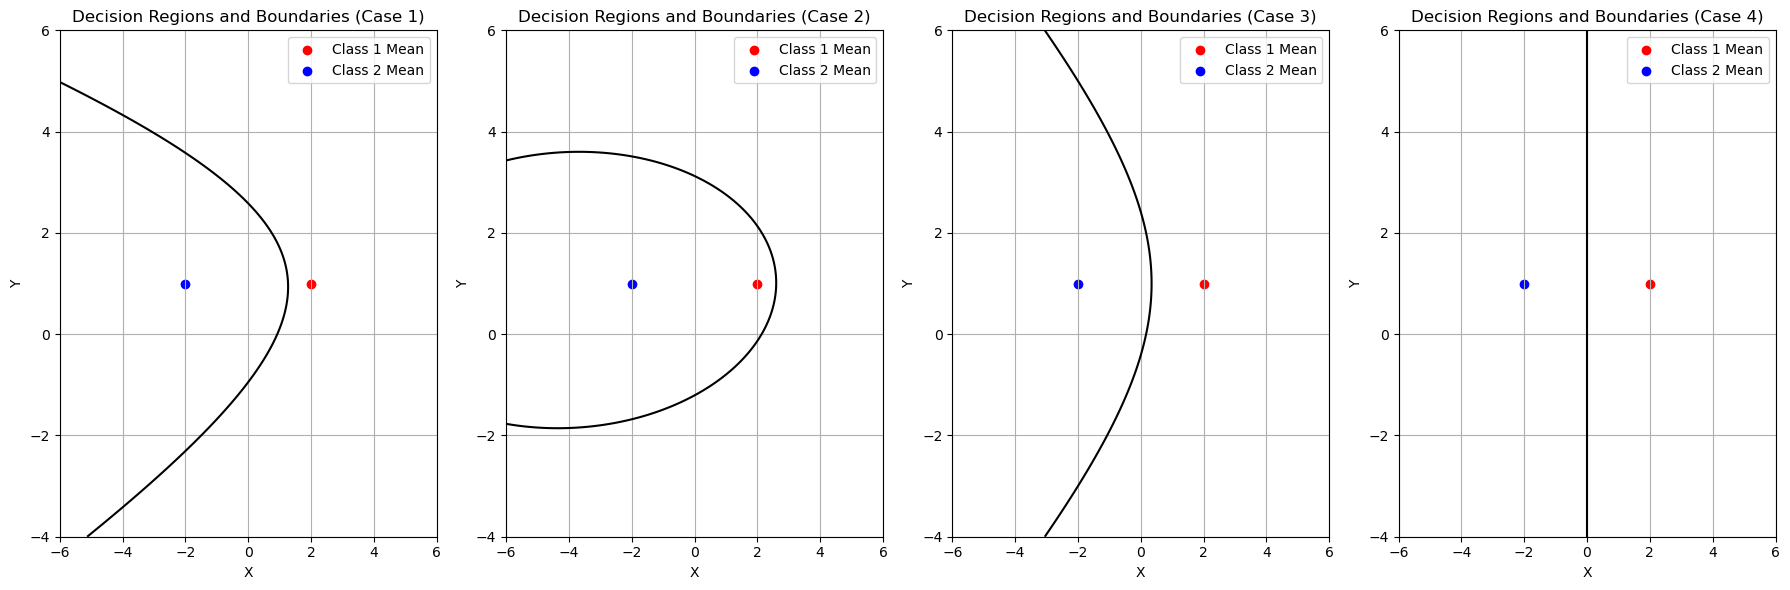

In [154]:
m1 = np.array([2, 1])
m2 = np.array([-2, 1])
Sigma1_case1 = 4 * np.array([[1, -1], [-1, 4]])
Sigma1_case2 = 16 * np.array([[1, -1], [-1, 4]])
Sigma1_case3 = np.array([[2, 0], [0, 2]])
Sigma2 = np.array([[4, 0], [0, 1]])
P_S1 = 0.5
P_S2 = 0.5

def decision_boundary(x, m1, m2, Sigma1, Sigma2, P_S1, P_S2):
    A = np.log(multivariate_normal.pdf(x, mean=m1, cov=Sigma1)) - np.log(multivariate_normal.pdf(x, mean=m2, cov=Sigma2))
    B = np.log(P_S2) - np.log(P_S1)
    return A - B

x = np.linspace(-6, 6, 500)
y = np.linspace(-4, 6, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# calc decision boundary for Case 1
decision_region_case1 = decision_boundary(pos, m1, m2, Sigma1_case1, Sigma2, P_S1, P_S2)

# calc decision boundary for Case 2
decision_region_case2 = decision_boundary(pos, m1, m2, Sigma1_case2, Sigma2, P_S1, P_S2)

# calc decision boundary for Case 3
decision_region_case3 = decision_boundary(pos, m1, m2, Sigma1_case3, Sigma2, P_S1, P_S2)

# calc decision boundary for Case 4
decision_region_case4 = decision_boundary(pos, m1, m2, Sigma2, Sigma2, P_S1, P_S2)

plt.figure(figsize=(18, 6))

plt.subplot(1, 4, 1)
plt.contour(X, Y, decision_region_case1, levels=[0], colors='black')
plt.scatter(m1[0], m1[1], c='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], c='blue', marker='o', label='Class 2 Mean')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Case 1)')
plt.legend()
plt.grid(True)

plt.subplot(1, 4, 2)
plt.contour(X, Y, decision_region_case2, levels=[0], colors='black')
plt.scatter(m1[0], m1[1], c='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], c='blue', marker='o', label='Class 2 Mean')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Case 2)')
plt.legend()
plt.grid(True)

plt.subplot(1, 4, 3)
plt.contour(X, Y, decision_region_case3, levels=[0], colors='black')
plt.scatter(m1[0], m1[1], c='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], c='blue', marker='o', label='Class 2 Mean')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Case 3)')
plt.legend()
plt.grid(True)

plt.subplot(1, 4, 4)
plt.contour(X, Y, decision_region_case4, levels=[0], colors='black')
plt.scatter(m1[0], m1[1], c='red', marker='o', label='Class 1 Mean')
plt.scatter(m2[0], m2[1], c='blue', marker='o', label='Class 2 Mean')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Regions and Boundaries (Case 4)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


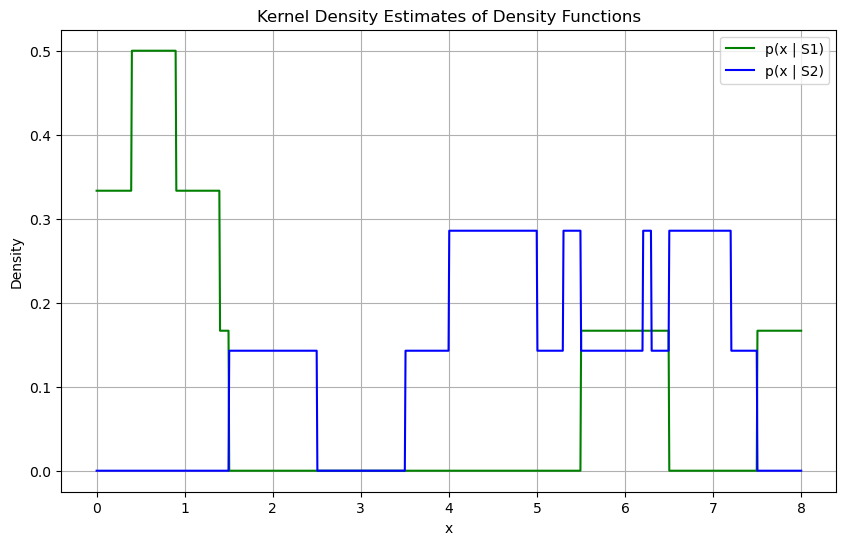

In [124]:
# problem 2a

S1 = [0, 0.4, 0.9, 1.0, 6.0, 8.0]
S2 = [2.0, 4.0, 4.5, 5.0, 5.8, 6.7, 7.0]

bandwidth = 1

#binary kernel function
def binary_kernel(u):
    return (np.abs(u) <= 0.5).astype(int)

# KDE for S1
def kde_S1(x):
    n = len(S1)
    return np.sum(binary_kernel((x - np.array(S1)) / bandwidth)) / (n * bandwidth)

# KDE for S2
def kde_S2(x):
    n = len(S2)
    return np.sum(binary_kernel((x - np.array(S2)) / bandwidth)) / (n * bandwidth)

x_values = np.linspace(min(min(S1), min(S2)), max(max(S1), max(S2)), 1000)

kde_values_S1 = [kde_S1(x) for x in x_values]
kde_values_S2 = [kde_S2(x) for x in x_values]

plt.figure(figsize=(10, 6))
plt.plot(x_values, kde_values_S1, label='p(x | S1)', color='green')
plt.plot(x_values, kde_values_S2, label='p(x | S2)', color='blue')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Kernel Density Estimates of Density Functions')
plt.legend()
plt.grid(True)
plt.show()


In [125]:
#problem 2b: 

num_samples_S1 = len(S1)
num_samples_S2 = len(S2)

total_samples = num_samples_S1 + num_samples_S2

prior_probability_S1 = num_samples_S1 / total_samples
prior_probability_S2 = num_samples_S2 / total_samples

print("Prior probability of S1:", prior_probability_S1)
print("Prior probability of S2:", prior_probability_S2)


Prior probability of S1: 0.46153846153846156
Prior probability of S2: 0.5384615384615384


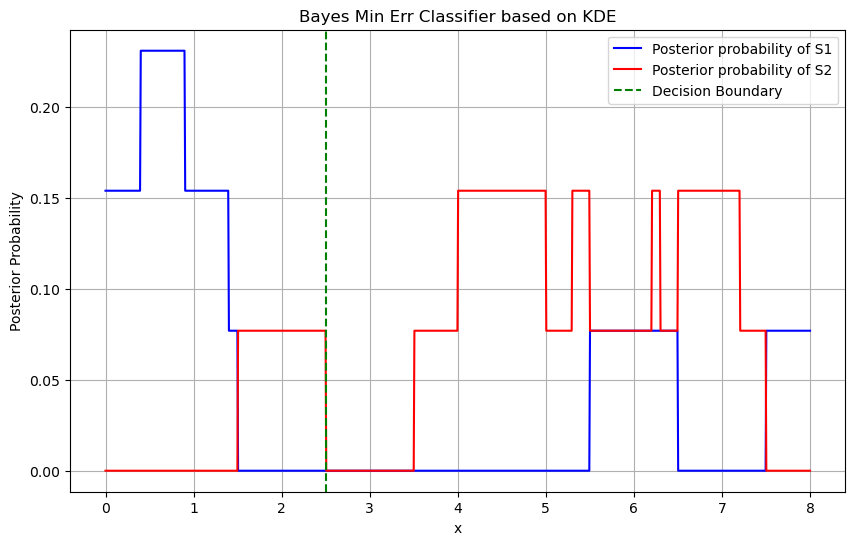

Decision Boundary: 2.5065065065065064


In [137]:
# problem 2c

S1 = [0, 0.4, 0.9, 1.0, 6.0, 8.0]
S2 = [2.0, 4.0, 4.5, 5.0, 5.8, 6.7, 7.0]

h = 1

def posterior_S1(x):
    return kde_S1(x) * prior_probability_S1

def posterior_S2(x):
    return kde_S2(x) * prior_probability_S2

x_values = np.linspace(min(min(S1), min(S2)), max(max(S1), max(S2)), 1000)

posterior_probs_S1 = np.array([posterior_S1(x) for x in x_values])
posterior_probs_S2 = np.array([posterior_S2(x) for x in x_values])

decision_boundary = x_values[np.argmin(np.abs(posterior_probs_S1 - posterior_probs_S2))]

plt.figure(figsize=(10, 6))
plt.plot(x_values, posterior_probs_S1, label='Posterior probability of S1', color='blue')
plt.plot(x_values, posterior_probs_S2, label='Posterior probability of S2', color='red')
plt.axvline(x=decision_boundary, color='green', linestyle='--', label='Decision Boundary')
plt.xlabel('x')
plt.ylabel('Posterior Probability')
plt.title('Bayes Min Err Classifier based on KDE')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
# problem 2d

# steps:
# 1. calc the posterior probabilities for each class (S1 and S2) for each point.
# 2. compare the posterior probabilities and assign each point to the class with the higher probability.


points = [3, 6.2, 8.5]

# Calculate posterior probabilities for each point
posterior_probs_points = []
for point in points:
    posterior_S1_point = posterior_S1(point)
    posterior_S2_point = posterior_S2(point)
    posterior_probs_points.append((posterior_S1_point, posterior_S2_point))

# Assign each point to the class with the higher probability
classifications = []
for posterior_probs_point in posterior_probs_points:
    if posterior_probs_point[0] > posterior_probs_point[1]:
        classifications.append("S1")
    else:
        classifications.append("S2")

# Print the classifications
for i, point in enumerate(points):
    print("Point {}: Classified as {}".format(point, classifications[i]))


Point 3: Classified as S2
Point 6.2: Classified as S2
Point 8.5: Classified as S1


In [132]:
# problem 2e

from sklearn.neighbors import KNeighborsClassifier

# Data points for S1 and S2
S1 = [0, 0.4, 0.9, 1.0, 6.0, 8.0]
S2 = [2.0, 4.0, 4.5, 5.0, 5.8, 6.7, 7.0]

X = S1 + S2
y = ['S1'] * len(S1) + ['S2'] * len(S2)

points = [[3], [6.2], [8.5]]
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(np.array(X).reshape(-1, 1), y)
    predictions = knn.predict(points)
    print(f"k = {k}: {predictions}")


k = 1: ['S2' 'S1' 'S1']
k = 3: ['S2' 'S2' 'S2']
k = 5: ['S2' 'S2' 'S2']


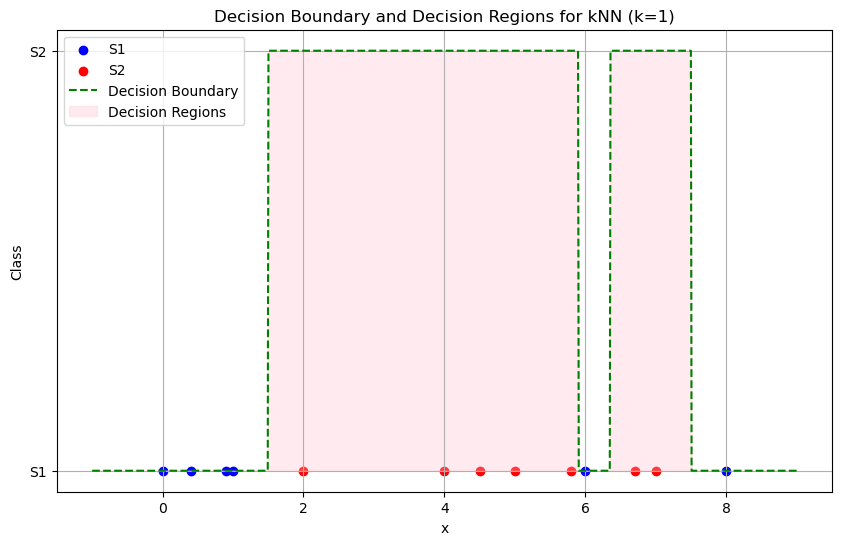

In [135]:
# problem 2e

X = S1 + S2
y = ['S1'] * len(S1) + ['S2'] * len(S2)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(np.array(X).reshape(-1, 1), y)

x_values = np.linspace(min(min(S1), min(S2)) - 1, max(max(S1), max(S2)) + 1, 1000)
X_mesh = np.array(x_values).reshape(-1, 1)
y_pred = knn.predict(X_mesh)

plt.figure(figsize=(10, 6))
plt.scatter(S1, [0] * len(S1), color='blue', label='S1')
plt.scatter(S2, [0] * len(S2), color='red', label='S2')

plt.plot(x_values, y_pred, color='green', linestyle='--', label='Decision Boundary')
plt.fill_between(x_values, y_pred, color='pink', alpha=0.3, label='Decision Regions')

plt.xlabel('x')
plt.ylabel('Class')
plt.title('Decision Boundary and Decision Regions for kNN (k=1)')
plt.legend()
plt.grid(True)
plt.show()
